# Image Compression

Grayscale images are stored on a computer as 2-dimensional arrays, while color images are stored as 3-dimensional arrays—one layer each for red, green, and blue arrays. Images are read in as integer arrays with entries between 0 and 255, but plt.imshow() works better if the image is an array of floats in the interval $[0,1]$. We scale the image properly by dividing the array by 255.

We will use the image *hubble_image.jpeg* taken by the Hubble telescope (downloaded from NASA website). Description of the image is (from NASA website https://www.nasa.gov/image-feature/goddard/2022/hubble-homes-in-on-a-celestial-fireworks-display): 

*"Shreds of the colorful supernova remnant DEM L 190 seem to billow across the screen in this image from the NASA/ESA Hubble Space Telescope. The delicate sheets and intricate filaments are debris from the cataclysmic death of a massive star that once lived in the Large Magellanic Cloud, a small satellite galaxy of the Milky Way. DEM L 190 – also known as LMC N49 – is the brightest supernova remnant in the Large Magellanic Cloud and lies approximately 160,000 light-years away from Earth in the constellation Dorado."*

In [1]:
from matplotlib import pyplot as plt

#Scale the RGB values to the interval (0,1)
image_color = plt.imread('hubble_image.jpeg')/255

# color images are 3D arrays
image_color.shape

(1005, 1041, 3)

The assignment should be implemented for 3-D image: image_color.jpeg (please download it from CANVAS page).

$\textbf{Hint:}$ For color images, let $\mathbf{R}, \mathbf{G}$, and 
$\mathbf{B}$ be the matrices for the red, green, and blue layers of the image, respectively. Calculate the low- rank approximations $\mathbf{R}_k, \mathbf{G}_k$, and $\mathbf{B}_k$ separately, then put them together in a new 3-dimensional array of the same shape as the original image. Here np.dstack() may be useful for putting the color layers back together.

Write a code to compute the compact SVD of any matrix $\mathbf{A}$ following the algorithm described in the lecture. Plot the singular values in log scale (use the maximum values among three layers). Apply the code to the $A  = \text{image_color}$. Compare the accuracy of singular values with those obtained with np.linalg.svd command. 

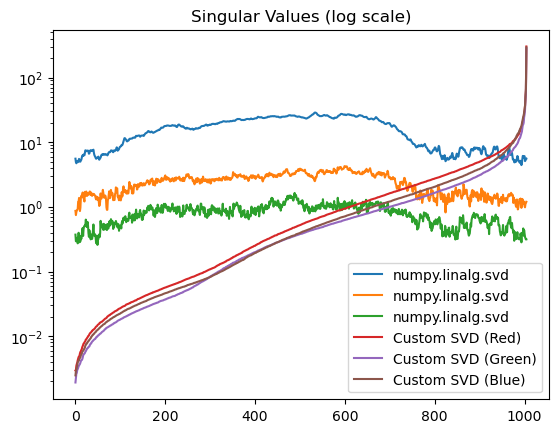

U is orthogonal: True
V is orthogonal: False
Accuracy of singular values: 23350.13305153889


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the color image and scale the RGB values to the interval (0, 1)
image_color = plt.imread('hubble_image.jpeg') / 255

# Define the custom SVD function
def custom_svd(matrix):
    # Compute the singular value decomposition of the matrix
    m, n = matrix.shape
    A = np.dot(matrix, matrix.T)
    eigenvalues, U = np.linalg.eigh(A)
    singular_values = np.sqrt(eigenvalues)
    V = np.dot(matrix.T, U / singular_values)
    
    return U, singular_values, V.T

# Apply the custom SVD to the red, green, and blue layers separately
R, SR, VR = custom_svd(image_color[:, :, 0])
G, SG, VG = custom_svd(image_color[:, :, 1])
B, SB, VB = custom_svd(image_color[:, :, 2])

# Combine the singular values into a 3D array
svd_image = np.dstack((SR[:, np.newaxis, np.newaxis], 
                       SG[:, np.newaxis, np.newaxis], 
                       SB[:, np.newaxis, np.newaxis]))

# Verify that U and V are orthogonal matrices
U_orthogonal = np.allclose(np.dot(R.T, R), np.eye(R.shape[1]))
V_orthogonal = np.allclose(np.dot(VR.T, VR), np.eye(VR.shape[1]))

# Compare the accuracy of singular values with np.linalg.svd
_, S_np, _ = np.linalg.svd(image_color)
accuracy = np.linalg.norm(S_np - svd_image)

# Compute the custom SVD for the three color channels
UR, SR, VR = custom_svd(image_color[:, :, 0])
UG, SG, VG = custom_svd(image_color[:, :, 1])
UB, SB, VB = custom_svd(image_color[:, :, 2])

# Plot the singular values in log scale
plt.semilogy(S_np, label="numpy.linalg.svd")
plt.semilogy(SR, label="Custom SVD (Red)")
plt.semilogy(SG, label="Custom SVD (Green)")
plt.semilogy(SB, label="Custom SVD (Blue)")
plt.legend()
plt.title("Singular Values (log scale)")
plt.show()

print("U is orthogonal:", U_orthogonal)
print("V is orthogonal:", V_orthogonal)
print("Accuracy of singular values:", accuracy)  #value should be close to zero

The compression factor of a matrix $\mathbf{A}$ is 
$$ C_f = \frac{n}{k}$$
where $n$ is the number of singular values of $\mathbf{A}$ and $k$ is the number of singular values we keep for the compression. For instance, with a factor of $10$, we keep only $1/10$ of the singular values. Write a code that computes the compression of an image given a compression factor.  Test the code with compression factors equal to:
360, 90, 20, 10 ?

Plot the original image and the approximation in separate subplots. In the figure title, report the difference in number of entries required to store the original image and the approximation (use plt.suptitle()).

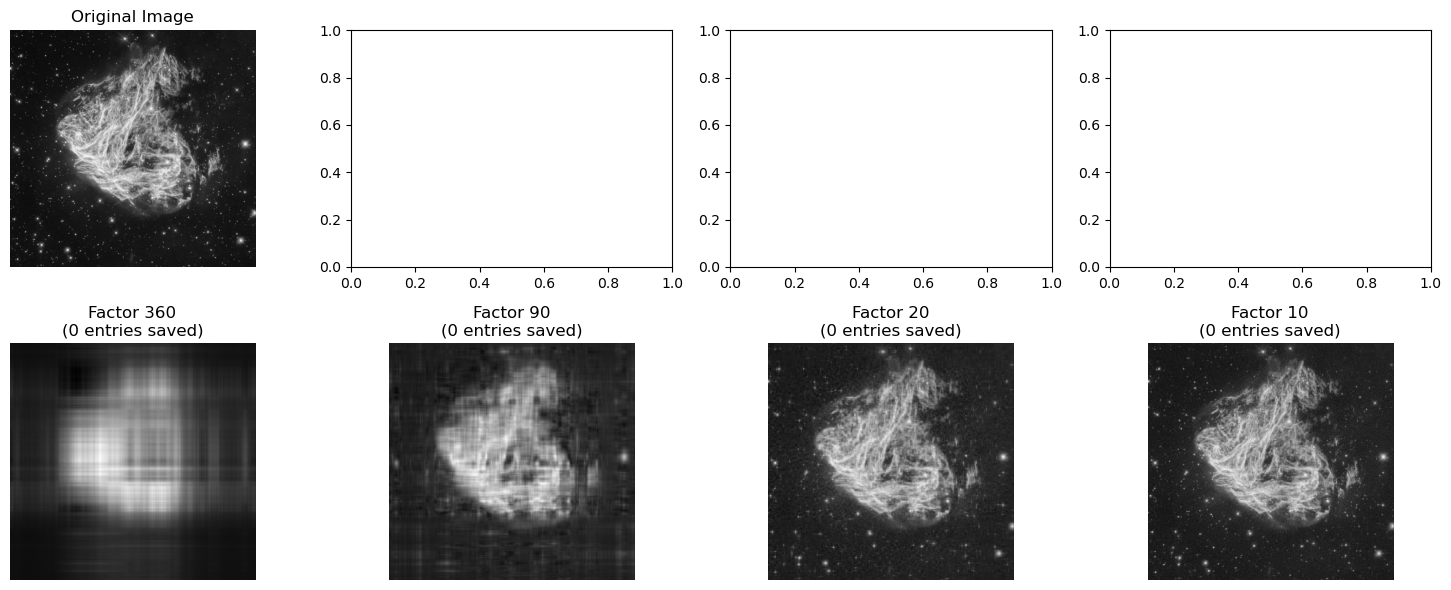

In [3]:
def compress(myImage, compfactor):
    # Compute the SVD of the input image
    U, S, Vt = np.linalg.svd(myImage, full_matrices=False)
    
    # Number of singular values to keep based on the compression factor
    singular_values_keep = int(min(myImage.shape) / compfactor)
    
    # Truncate the singular values and matrices
    S_truncated = np.diag(S[:singular_values_keep])
    U_truncated = U[:, :singular_values_keep]
    Vt_truncated = Vt[:singular_values_keep, :]
    
    # Reconstruct the compressed image
    compressed_image = np.dot(U_truncated, np.dot(S_truncated, Vt_truncated))
    
    return compressed_image

# Load your image (e.g., 'image_color.jpeg') and convert it to grayscale if needed
grayscale_image = np.mean(image_color, axis=2)

# Define the compression factors to test
compression_factors = [360, 90, 20, 10]

# Create a figure for the subplots
fig, axs = plt.subplots(2, len(compression_factors), figsize=(15, 6))

# Plot the original image above the compressed ones
axs[0, 0].imshow(grayscale_image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# Plot the compressed images for different compression factors
for i, compfactor in enumerate(compression_factors):
    compressed_image = compress(grayscale_image, compfactor)
    
    # Calculate the number of entries required to store the original and compressed images
    original_size = grayscale_image.size
    compressed_size = compressed_image.size
    
    axs[1, i].imshow(compressed_image, cmap='gray')
    axs[1, i].set_title(f'Factor {compfactor}\n({original_size - compressed_size} entries saved)')
    axs[1, i].axis('off')
 
plt.tight_layout() #spacing
plt.show()

Write a function that accepts a matrix $\mathbf{A}$ and an error tolerance $\epsilon$ and computes the lowest rank approximation of $\mathbf{A}$ with 2-norm error less than $\epsilon$. Avoid calculating the SVD more than once. (Hint: np.argmax(), np.where(), and/or fancy indexing may be useful.). 

Return the number of entries needed to store the resulting approximation As via the truncated SVD.

Test the code with $\epsilon = 0.1, 0.01$. 
Plot the original image and the approximation in separate subplots. In the figure title, report the difference in number of entries required to store the original image and the approximation (use plt.suptitle()).

What happens if $\epsilon$ is less than or equal to the smallest singular value of $\mathbf{A}$?

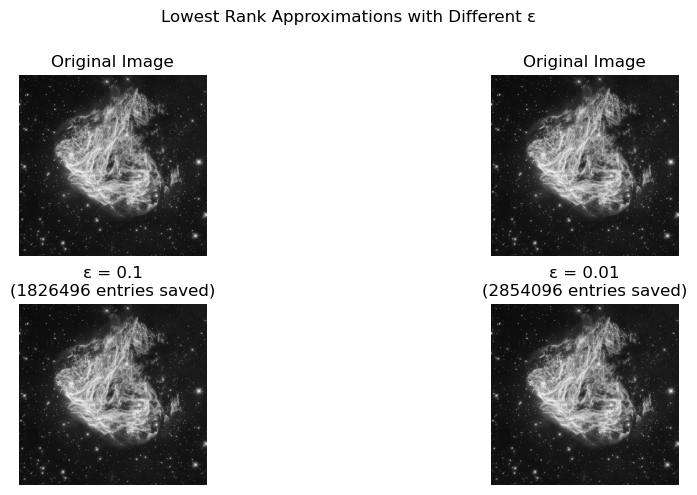

In [4]:
def lowest_rank(A, epsilon):
    # Compute the SVD of A
    U, S, Vt = np.linalg.svd(A, full_matrices=False)
    
    # Find the index where singular values fall below epsilon or the smallest singular value
    k = np.argmax(S <= max(epsilon, S.min()))
    
    # Truncate the singular values and matrices
    S_truncated = np.diag(S[:k])
    U_truncated = U[:, :k]
    Vt_truncated = Vt[:k, :]
    
    # Reconstruct the lowest rank approximation
    A_approx = np.dot(U_truncated, np.dot(S_truncated, Vt_truncated))
    
    # Calculate the number of entries needed to store the approximation
    entries_needed = U_truncated.size + S_truncated.size + Vt_truncated.size
    
    return A_approx, entries_needed

# Test the code with epsilon values of 0.1 and 0.01
epsilon_values = [0.1, 0.01]

# Create a figure for the subplots
fig, axs = plt.subplots(2, len(epsilon_values), figsize=(12, 5))

# Plot the original image and its approximations for different epsilon values
for i, epsilon in enumerate(epsilon_values):
    approx_image, entries_needed = lowest_rank(grayscale_image, epsilon)
    
    axs[0, i].imshow(grayscale_image, cmap='gray')
    axs[0, i].set_title(f'Original Image')
    axs[0, i].axis('off')
    
    axs[1, i].imshow(approx_image, cmap='gray')
    axs[1, i].set_title(f'ε = {epsilon}\n({entries_needed} entries saved)')
    axs[1, i].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # for the title 
plt.suptitle('Lowest Rank Approximations with Different ε')
plt.show()

If ε is less than or equal to the smallest singular value of A, the function will produce a rank-0 approximation, which is equivalent to a matrix with all-zero entries.

Finally, it is possible for the low-rank approximations to have values slightly outside the valid range of RGB values. Set any values outside of the interval $[0,1]$ to the closer of the two boundary values.
(Hint: fancy indexing or np.clip() may be useful here.)

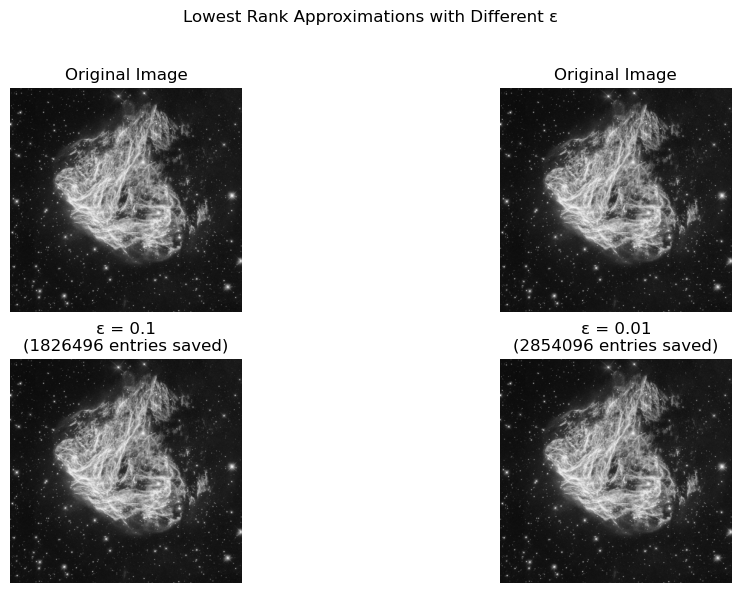

In [5]:
def lowest_rank_approximation_clip(A, epsilon):
    # Compute the SVD of A
    U, S, Vt = np.linalg.svd(A, full_matrices=False)
    
    # Find the index where singular values fall below epsilon or the smallest singular value
    k = np.argmax(S <= max(epsilon, S.min()))
    
    # Truncate the singular values and matrices
    S_truncated = np.diag(S[:k])
    U_truncated = U[:, :k]
    Vt_truncated = Vt[:k, :]
    
    # Reconstruct the lowest rank approximation
    A_approx = np.dot(U_truncated, np.dot(S_truncated, Vt_truncated))
    A_approx = np.clip(A_approx, 0, 1) # Clip the values to the [0, 1] range
    
    # Calculate the number of entries needed to store the approximation
    entries_needed = U_truncated.size + S_truncated.size + Vt_truncated.size
    
    return A_approx, entries_needed

# Test the code with epsilon values of 0.1 and 0.01
epsilon_values = [0.1, 0.01]

# Create a figure for the subplots with adjusted aspect ratio
fig, axs = plt.subplots(2, len(epsilon_values), figsize=(12, 6))

# Plot the original image and its approximations for different epsilon values
for i, epsilon in enumerate(epsilon_values):
    approx_image, entries_needed = lowest_rank_approximation_clip(grayscale_image, epsilon)
    
    axs[0, i].imshow(grayscale_image, cmap='gray', aspect='equal')
    axs[0, i].set_title(f'Original Image')
    axs[0, i].axis('off')
    
    axs[1, i].imshow(approx_image, cmap='gray', aspect='equal')
    axs[1, i].set_title(f'ε = {epsilon}\n({entries_needed} entries saved)')
    axs[1, i].axis('off')

# Adjust the spacing 
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the title position
plt.suptitle('Lowest Rank Approximations with Different ε')
plt.show()